In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 

# Reading the traina and test data from the txt file
X_train = pd.read_csv('Dataset/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
Y_train = pd.read_csv('Dataset/UCI HAR Dataset/train/y_train.txt',delim_whitespace=True,header=None)
X_test = pd.read_csv('Dataset/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
Y_test = pd.read_csv('Dataset/UCI HAR Dataset/test/y_test.txt',delim_whitespace=True,header=None)

Y_train = Y_train.squeeze()
Y_test = Y_test.squeeze()

In [3]:
print("X_train shape = %s, Y_train shape= %s "%(X_train.shape, Y_train.shape))
print("X_test shape = %s, Y_test shape= %s "%(X_test.shape, Y_test.shape))

X_train shape = (7352, 561), Y_train shape= (7352,) 
X_test shape = (2947, 561), Y_test shape= (2947,) 


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [13]:
predictions = rfc.predict(X_test)
#getting the accuracy
score = rfc.score(X_test, Y_test)
print(score)

0.9297590770274856


In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)

[[482   7   7   0   0   0]
 [ 38 427   6   0   0   0]
 [ 23  41 356   0   0   0]
 [  0   0   0 433  58   0]
 [  0   0   0  45 487   0]
 [  0   0   0   0   0 537]]


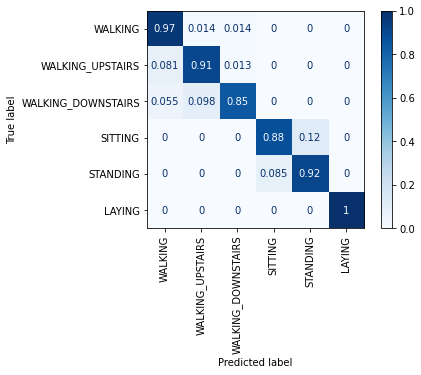

In [7]:
from sklearn.metrics import plot_confusion_matrix
class_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
plot_confusion_matrix(rfc, X_test, Y_test, cmap=plt.cm.Blues,
                                display_labels=class_names, xticks_rotation=90,
                                normalize='true')

## Parameter selection/tuning using Grid search

In [24]:
from sklearn.model_selection import GridSearchCV
n_estimators = [10, 50, 75, 100, 120, 150]
min_samples_split = [2, 5, 10, 50, 100]
param_grid = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split}
gs = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=4, cv=2)


In [25]:
%%time 
gs.fit(X_train, Y_train, )

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV 1/2] END ...........min_samples_split=2, n_estimators=10; total time=   0.5s
[CV 2/2] END ...........min_samples_split=2, n_estimators=10; total time=   0.4s
[CV 1/2] END ...........min_samples_split=2, n_estimators=50; total time=   2.0s
[CV 2/2] END ...........min_samples_split=2, n_estimators=50; total time=   2.1s
[CV 1/2] END ...........min_samples_split=2, n_estimators=75; total time=   3.0s
[CV 2/2] END ...........min_samples_split=2, n_estimators=75; total time=   3.2s
[CV 1/2] END ..........min_samples_split=2, n_estimators=100; total time=   4.0s
[CV 2/2] END ..........min_samples_split=2, n_estimators=100; total time=   4.4s
[CV 1/2] END ..........min_samples_split=2, n_estimators=120; total time=   4.8s
[CV 2/2] END ..........min_samples_split=2, n_estimators=120; total time=   5.1s
[CV 1/2] END ..........min_samples_split=2, n_estimators=150; total time=   6.0s
[CV 2/2] END ..........min_samples_split=2, n_es

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'min_samples_split': [2, 5, 10, 50, 100],
                         'n_estimators': [10, 50, 75, 100, 120, 150]},
             verbose=4)

In [26]:
results = pd.DataFrame.from_dict(gs.cv_results_)
scores_matrix = results.pivot(index='param_n_estimators', columns='param_min_samples_split',
                                values='mean_test_score')

Text(0, 0.5, 'mean_test_score')

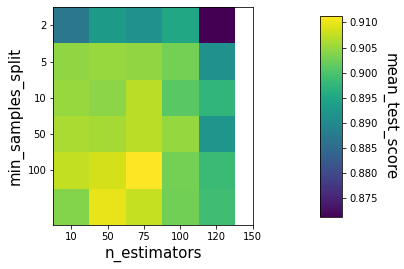

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(scores_matrix)

ax.set_xticks(np.arange(len(n_estimators)))
ax.set_xticklabels(['{:d}'.format(x) for x in n_estimators])
ax.set_xlabel('n_estimators', fontsize=15)

ax.set_yticks(np.arange(len(min_samples_split)))
ax.set_yticklabels(['{:d}'.format(x) for x in min_samples_split])
ax.set_ylabel('min_samples_split', fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_ylabel('mean_test_score', rotation=-90, va="bottom",
                    fontsize=15)

In [28]:
gs.cv_results_['mean_test_score']

array([0.88710555, 0.9046518 , 0.90505985, 0.906284  , 0.90764418,
       0.90383569, 0.89309032, 0.90519587, 0.90437976, 0.90587595,
       0.90873232, 0.90995647, 0.89145811, 0.9046518 , 0.90710011,
       0.90723613, 0.91131665, 0.9077802 , 0.89526659, 0.90288357,
       0.90111534, 0.90492383, 0.90288357, 0.90274755, 0.87119151,
       0.89145811, 0.89757889, 0.89213819, 0.89853101, 0.89907508])

In [29]:
gs.cv_results_['mean_test_score'].max()

0.911316648531012

In [30]:
gs.score(X_test, Y_test)

0.9280624363759755